# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-05-01 00:09:33.408956: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 00:09:33.409269: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 00:09:33.411549: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 00:09:33.437887: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 00:09:33.952724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=42)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [12]:
model.fit(train_images, train_labels, epochs=40)

Epoch 1/40: accuracy 11.000%
Epoch 2/40: accuracy 10.700%
Epoch 3/40: accuracy 9.700%
Epoch 4/40: accuracy 10.800%
Epoch 5/40: accuracy 10.400%
Epoch 6/40: accuracy 10.700%
Epoch 7/40: accuracy 10.000%
Epoch 8/40: accuracy 10.900%
Epoch 9/40: accuracy 9.700%
Epoch 10/40: accuracy 9.000%
Epoch 11/40: accuracy 10.000%
Epoch 12/40: accuracy 9.700%
Epoch 13/40: accuracy 9.600%
Epoch 14/40: accuracy 9.800%
Epoch 15/40: accuracy 10.400%
Epoch 16/40: accuracy 9.700%
Epoch 17/40: accuracy 10.800%
Epoch 18/40: accuracy 10.500%
Epoch 19/40: accuracy 10.600%
Epoch 20/40: accuracy 10.500%
Epoch 21/40: accuracy 10.400%
Epoch 22/40: accuracy 9.700%
Epoch 23/40: accuracy 9.900%
Epoch 24/40: accuracy 10.300%
Epoch 25/40: accuracy 12.000%
Epoch 26/40: accuracy 9.300%
Epoch 27/40: accuracy 10.600%
Epoch 28/40: accuracy 10.100%
Epoch 29/40: accuracy 11.200%
Epoch 30/40: accuracy 10.900%
Epoch 31/40: accuracy 10.400%
Epoch 32/40: accuracy 10.600%
Epoch 33/40: accuracy 9.400%
Epoch 34/40: accuracy 9.700%
E

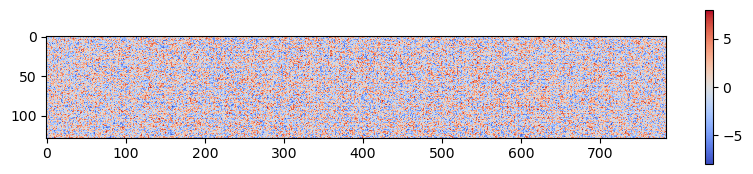

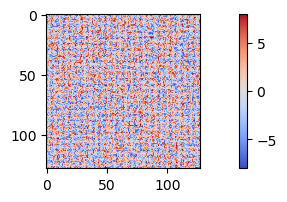

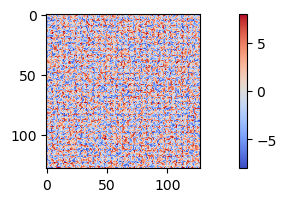

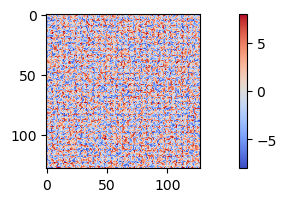

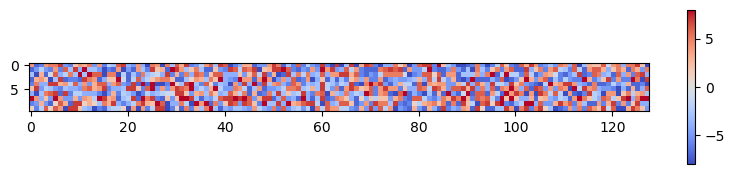

In [7]:
def show_weights(weights):
    plt.figure(figsize = (10, 2))
    plt.imshow(weights, cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.show()

show_weights(model.input_weights)
show_weights(model.hidden_weights[0])

# print("⬤\n⬤\n⬤\n")
show_weights(model.hidden_weights[1])

show_weights(model.hidden_weights[-1])
show_weights(model.output_weights)

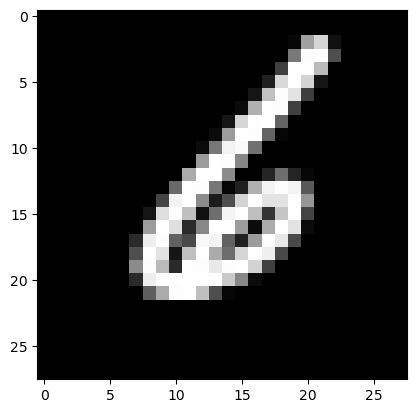

[  0   0   0   0   0 255   0   0 255   0 255   0   0 255 255   0   0 255
 255 255   0   0 255   0 255 255 255   0   0 255 255 255 255 255   0 255
   0   0 255   0 255 255 255 255   0 255 255   0   0   0   0 255  37   0
 255 255 255 255   0   0 255   0 255   0 255   0 255 203   0 255 255   0
 222   0 255   0   0   0 255   0   0   0   0   0   0 255 255 255   0   0
   0   0 255   0   0 255   0 255   0   0   0   0 255   0 255   0 255   0
 255   0 255 255   0   0   0 255   0   0 255 255   0 255 255   0   0   0
 255   0]
[  0   0   0   0 255 255 255 255   0 255 255 255 255 255 255 255   0   0
 255 255   0   0 255   0 255 255 255 255   0   0   0 255 255 255 255 255
   0   0   0   0   0   0 255   0   0 255 255   0   0 255 255 255 255 255
   0 255 255 255   0   0   0 255 255   0 255 255   0   0   0   0   0   0
   0 255   0 255   0   0   0   0 255 255 255 255   0 255   0 255   0 255
   0 255 255 255   0 255 255   0 255   0   0 255   0 255   0 255   0   0
   0 255   0 255   0 255 255 255   0   0 

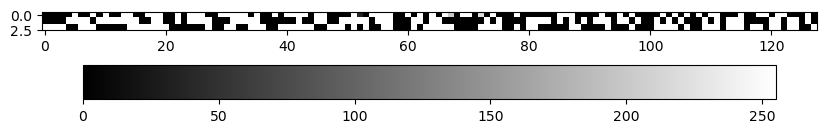

[  0   0   0 255   0   0   0 255 255   0] --> 3


In [8]:
plt.imshow(train_images[N-1].reshape(28,28), cmap="grey")
plt.show()
print(model.last_intermediate_outputs[0])
# print("\n⬤\n⬤\n⬤\n")
print(model.last_intermediate_outputs[1])
print(model.last_intermediate_outputs[-1])
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
plt.show()
print(model.last_outputs, "-->", model.last_answer)